In [1]:
import random

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import empiricaldist as emd
import scipy.stats as st

np.random.seed(45)

## CONFOUNDERS

There are different types of confounders. If you're interested in causal inference, you should be aware of them. [*Statistical Rethinking*](https://github.com/rmcelreath/stat_rethinking_2024) does a good job introducing the types but I wanted to include it here in the repo, with code in Python. So, here we go.

### THE FORK

The fork is the one that you get to know first. An example:

There seems to be a positive relationship between amount of sunscreen and skin cancer. Does the sunscreen cause cancer? You guessed it, there's a *common cause*, exposure to sunlight.

To "control" for the effect of the third variable, we need to condition on it.

In [2]:
cols = {0: 'C1', 1: 'C10'} # categorical var
n = 300

# Simulate data
z = np.random.binomial(1, 0.5, size=n)
x = np.random.normal(2*z - 1, 1)  # mean depends on
y = np.random.normal(2*z - 1, 1)

In [3]:
def fit_and_plot(x, y, mask=None, color='black', lw=3):
    if mask is not None:
        x, y = x[mask], y[mask]
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = model.predict(x_line.reshape(-1, 1))
    plt.plot(x_line, y_line, color=color, linewidth=lw)

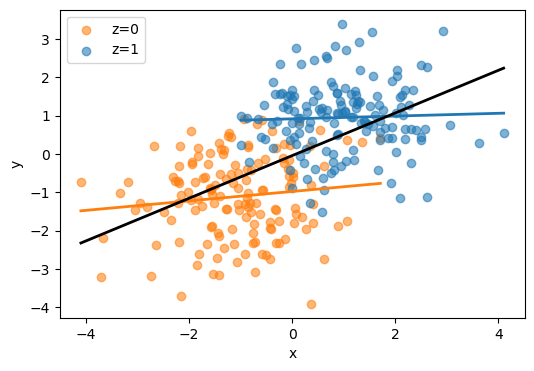

In [4]:
plt.figure(figsize=(6, 4))

for level in list(set(z)):
    plt.scatter(x[z == level], y[z == level], color=cols[level], label=f'z={level}', alpha=.57)

# Z==1 line (red)
fit_and_plot(x, y, mask=(z==1), color='C10', lw=2)

# Z==0 line (blue)
fit_and_plot(x, y, mask=(z==0), color='C1', lw=2)

# Overall regression line (black)
fit_and_plot(x, y, mask=None, color='black', lw=2)

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

### THE PIPE

With the pipe, effect is through another variable. Like: X -> Z -> Y. In this case, Z is called the *mediator*.

There is a good example that Richard McElreath gives: Let's say you're doing an experiment regarding plant growth. You have a treatment, and your purpose is to understand its causal effect on plant growth. You treat half of the fungus. Now, you have:

* Height at time = 0 (H_0).
* Height at time = 1 (H_1).
* Fungus presence (F).
* Treatment (T).

Should you include fungus presence in your model?

If your aim is to estimate total causal effect of the treatment variable, conditioning on the fungus will block the path (i.e., T -> F -> H_1), and you may conclude that the treatment has no effect. But in reality, it actually does! So, in this case, you shouldn't include the mediator in your model.

Think of it this way: *Once you know the presence of fungus, how much information does the treatment provides?*

In [5]:
from scipy.special import expit

x = np.random.normal(size=n)
p = expit(x)
z = np.random.binomial(1, p, size=n) 
y = np.random.normal(loc=(2*z - 1), scale=1, size=n)

In [6]:
def fit_and_plot(x, y, mask=None, color='black', lw=3):
    if mask is not None:
        x, y = x[mask], y[mask]
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = model.predict(x_line.reshape(-1, 1))
    plt.plot(x_line, y_line, color=color, linewidth=lw)

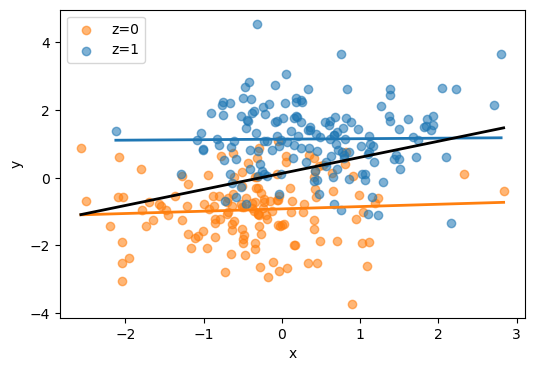

In [7]:
plt.figure(figsize=(6, 4))

for level in list(set(z)):
    plt.scatter(x[z == level], y[z == level], color=cols[level], label=f'z={level}', alpha=.57)

fit_and_plot(x, y, mask=(z == 1), color='C10', lw=2)
fit_and_plot(x, y, mask=(z == 0), color='C1', lw=2)
fit_and_plot(x, y, color='black', lw=2)

plt.xlabel('x')
plt.ylabel('y')

plt.legend()